#### Linear Regression Practical Implementation with Python

In [29]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns

In [30]:
dataset = fetch_california_housing()
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [31]:
print(dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [32]:
print(dataset.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [33]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [34]:
df['Price'] = dataset.target

In [35]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
Price,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


##### Let's take a sample of the data to plot it

In [37]:
df_copy = df.sample(frac=0.25)

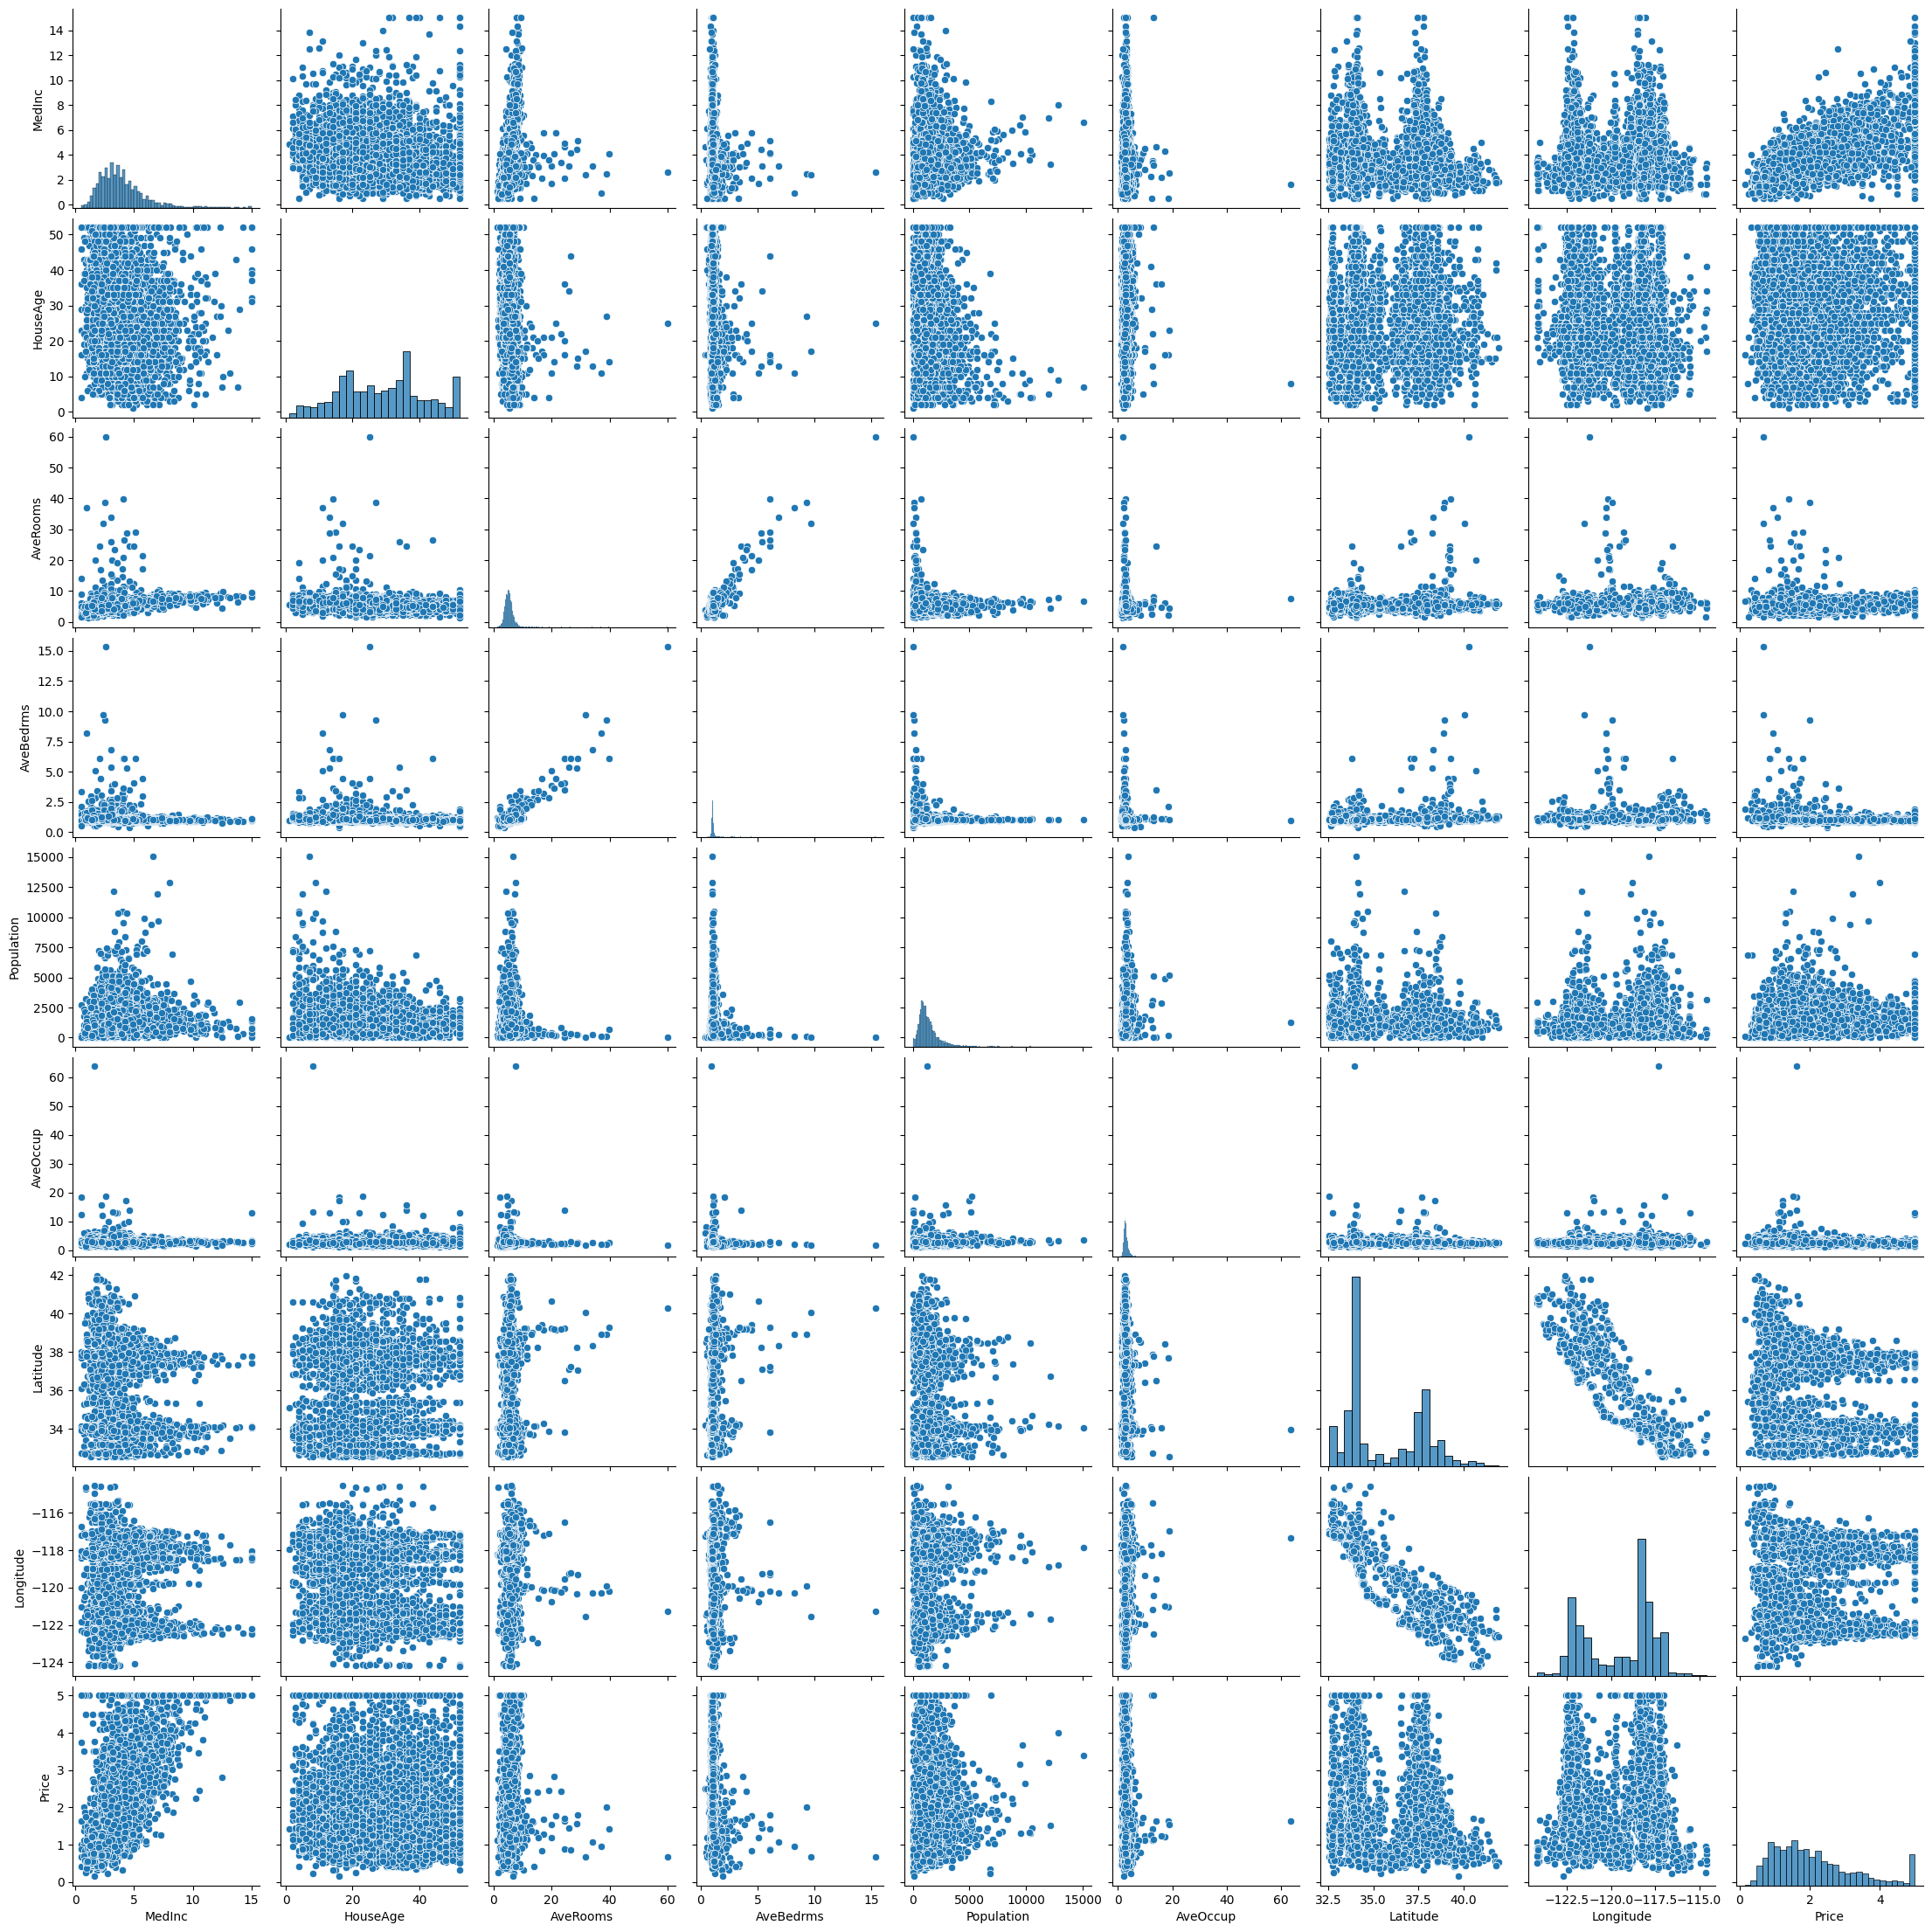

In [38]:
sns.pairplot(df_copy)

In [39]:
# Divide the dataset into dependent and independent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [43]:
X.shape

(20640, 8)

In [45]:
X_train.shape, X_test.shape

((13828, 8), (6812, 8))

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [50]:
X_train =scaler.fit_transform(X_train)

In [51]:
X_train

array([[-1.52169954, -0.75868455, -0.91813082, ..., -0.04014979,
        -0.78315293,  0.65090402],
       [ 0.18205382,  0.3523991 ,  0.30748451, ..., -0.05943619,
         0.8475975 , -1.31911678],
       [-0.17232772,  1.06666717, -0.25107784, ...,  0.09515433,
        -0.87218816,  0.66087881],
       ...,
       [-0.49518065,  0.59048846, -0.59192622, ...,  0.01608523,
        -0.75972261,  0.60103008],
       [ 0.96816708, -1.07613702,  0.39144665, ...,  0.0039722 ,
         0.90383028, -1.18445713],
       [-0.68377427,  1.86029835, -0.83041358, ..., -0.08065717,
         0.9928655 , -1.41387727]])

In [53]:
X_test= scaler.transform(X_test)

In [54]:
X_test

array([[-1.15370815, -0.28250584, -0.50803348, ...,  0.05921216,
         0.19154848,  0.28682423],
       [-0.70700034,  0.11430975, -0.16215378, ..., -0.03549556,
        -0.23956945,  0.06239148],
       [-0.20842797,  1.86029835, -0.59583032, ..., -0.13983657,
         1.0069237 , -1.42385206],
       ...,
       [-0.02167353, -1.07613702,  0.40141018, ...,  0.03744641,
         1.43335556, -0.90516304],
       [ 0.27275111, -1.47295261,  0.29311784, ...,  0.0519346 ,
        -0.73160623,  1.09478213],
       [-0.59570436,  1.78093523, -0.64482761, ..., -0.06665881,
         0.99755157, -1.43881424]])

In [55]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [56]:
regression.fit(X_train, y_train)

LinearRegression()

In [57]:
regression.coef_

array([ 8.46603472e-01,  1.20333548e-01, -2.98800785e-01,  3.47243173e-01,
       -8.81413334e-05, -4.17242067e-02, -8.94420371e-01, -8.70401317e-01])

In [58]:
regression.intercept_

2.0666362048018536

In [60]:
#prediction
y_pred =regression.predict(X_test)

In [61]:
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
print(mse)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
print(np.sqrt(mse))

0.5369686543372459
0.5295710106684453
0.7327814505957735


In [62]:
### Accuracy: r2 and adjusted r square
from sklearn.metrics import r2_score

In [67]:
score = r2_score(y_test, y_pred)
score

0.5970494128783952

In [65]:
# Adjusted R-squared
1 - (1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)

0.5968931623477872

In [69]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [70]:
y_pred = ridge.predict(X_test)

In [71]:
mse = mean_squared_error(y_test, y_pred)
print(mse)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
print(np.sqrt(mse))

0.5369457054801823
0.5295668709657081
0.732765791696216


In [72]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [73]:
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
print(np.sqrt(mse))


1.3326257277946882
0.9126511897647483
1.15439409553007


In [74]:
from sklearn.linear_model import ElasticNet
elasictnet = ElasticNet()
elasictnet.fit(X_train, y_train)


ElasticNet()

In [76]:
y_pred = elasictnet.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
print(np.sqrt(mse))


1.061031401183927
0.8119183692654034
1.0300637850074756


In [77]:
df_copy.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.118716,0.382897,-0.090999,0.009967,-0.051046,-0.077854,-0.021016,0.689711
HouseAge,-0.118716,1.000000,-0.170737,-0.090586,-0.318866,-0.031936,0.019082,-0.120759,0.120028
AveRooms,0.382897,-0.170737,1.000000,0.777093,-0.078890,-0.008163,0.127015,-0.037320,0.164464
AveBedrms,-0.090999,-0.090586,0.777093,1.000000,-0.074631,-0.040130,0.093398,0.007579,-0.083213
Population,0.009967,-0.318866,-0.078890,-0.074631,1.000000,0.118112,-0.109800,0.104033,-0.031720
AveOccup,-0.051046,-0.031936,-0.008163,-0.040130,0.118112,1.000000,-0.101129,0.113376,-0.164434
Latitude,-0.077854,0.019082,0.127015,0.093398,-0.109800,-0.101129,1.000000,-0.924289,-0.143328
Longitude,-0.021016,-0.120759,-0.037320,0.007579,0.104033,0.113376,-0.924289,1.000000,-0.048917
Price,0.689711,0.120028,0.164464,-0.083213,-0.031720,-0.164434,-0.143328,-0.048917,1.000000
